<a href="https://colab.research.google.com/github/HwangHanJae/datascience-basic-tect/blob/main/seaborn_pairgrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [3]:
#라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [4]:
#그래프가 잘보이게 하기 위해 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이게 하기위하여
set_matplotlib_formats('svg')

###pairgird
- 데이터 셋의 pairwise 관계를 그리기 위한 서브플롯 그리드

###pairgird 실습에 사용할 데이터
- penguins
  - species(object) : 펭귄의 종
  - island(object) : 섬
  - bill_length_mm(float64) : 부리의 길이
  - bill_depth_mm(float64) : 부리의 깊이
  - flipper_length_mm(float64) : 팔의 길이
  - body_mass_g(float64) : 몸의 질량
  - sex(object) : 성별

####penguins

In [5]:
#데이터 로드하기
penguins = sns.load_dataset('penguins')

In [6]:
#데이터 정보
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
#데이터 수치적 요약
penguins.describe(include=np.number)

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

In [8]:
#데이터 범주형 요약
penguins.describe(include='object')

species  island   sex
count      344     344   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       152     168   168

In [9]:
#결측치 확인
penguins[penguins['sex'].isnull()]

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g  sex
3    Adelie  Torgersen             NaN  ...                NaN          NaN  NaN
8    Adelie  Torgersen            34.1  ...              193.0       3475.0  NaN
9    Adelie  Torgersen            42.0  ...              190.0       4250.0  NaN
10   Adelie  Torgersen            37.8  ...              186.0       3300.0  NaN
11   Adelie  Torgersen            37.8  ...              180.0       3700.0  NaN
47   Adelie      Dream            37.5  ...              179.0       2975.0  NaN
246  Gentoo     Biscoe            44.5  ...              216.0       4100.0  NaN
286  Gentoo     Biscoe            46.2  ...              214.0       4650.0  NaN
324  Gentoo     Biscoe            47.3  ...              216.0       4725.0  NaN
336  Gentoo     Biscoe            44.5  ...              217.0       4875.0  NaN
339  Gentoo     Biscoe             NaN  ...                NaN          NaN  NaN

[11 rows x 7 columns]

####그래프 확인

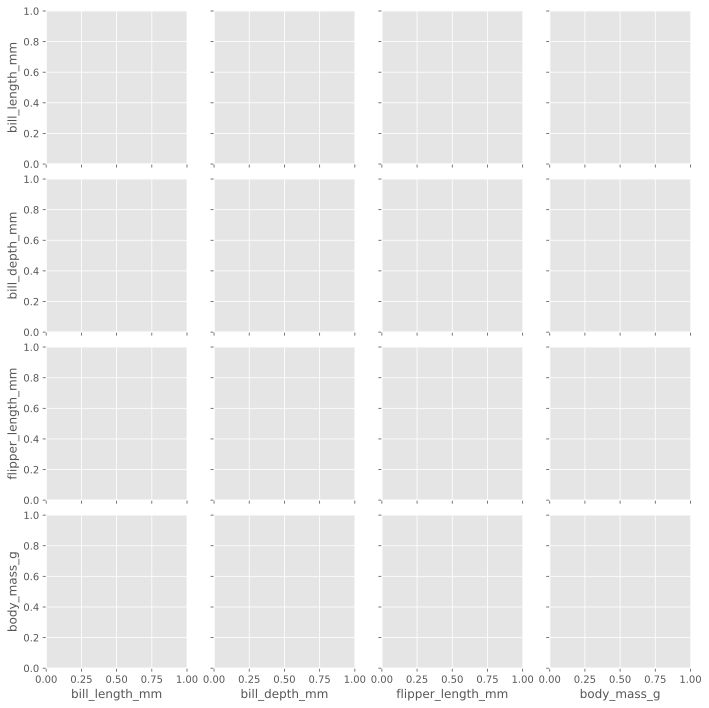

In [10]:
g = sns.PairGrid(data=penguins)

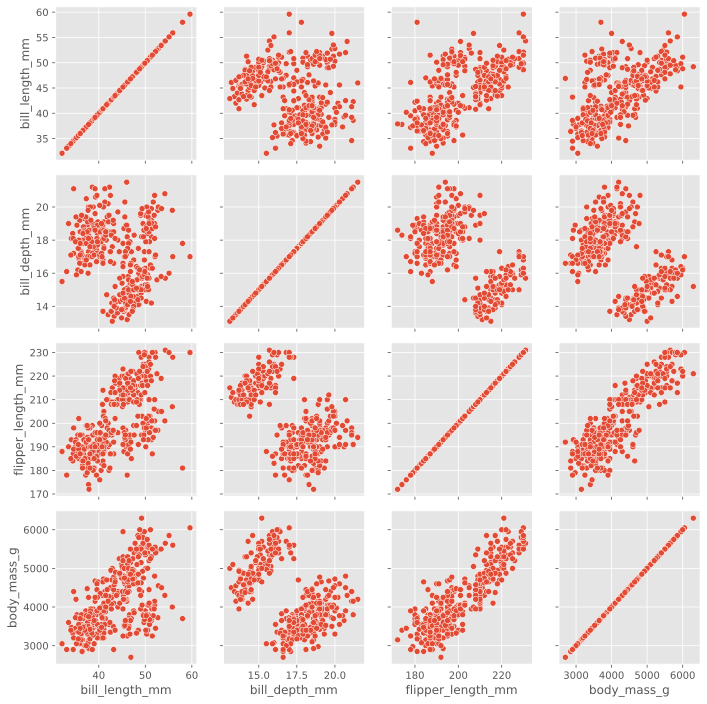

In [11]:
#PairGrid().map 함수 사용
g = sns.PairGrid(data=penguins)
g.map(sns.scatterplot)

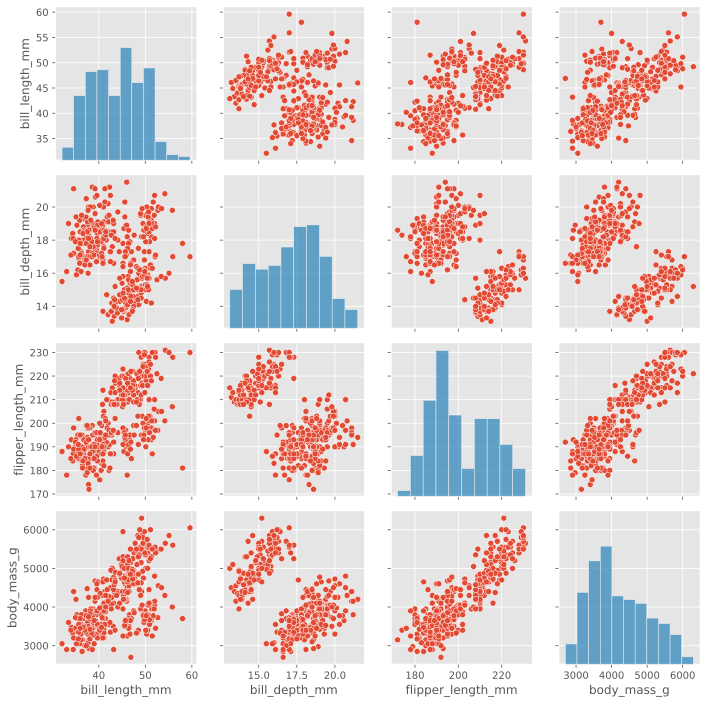

In [12]:
#map_diag(), map_offfdiag() 함수 사용
g = sns.PairGrid(data=penguins)
g.map_diag(sns.histplot) #대각선
g.map_offdiag(sns.scatterplot) #대각선을 제외한 곳

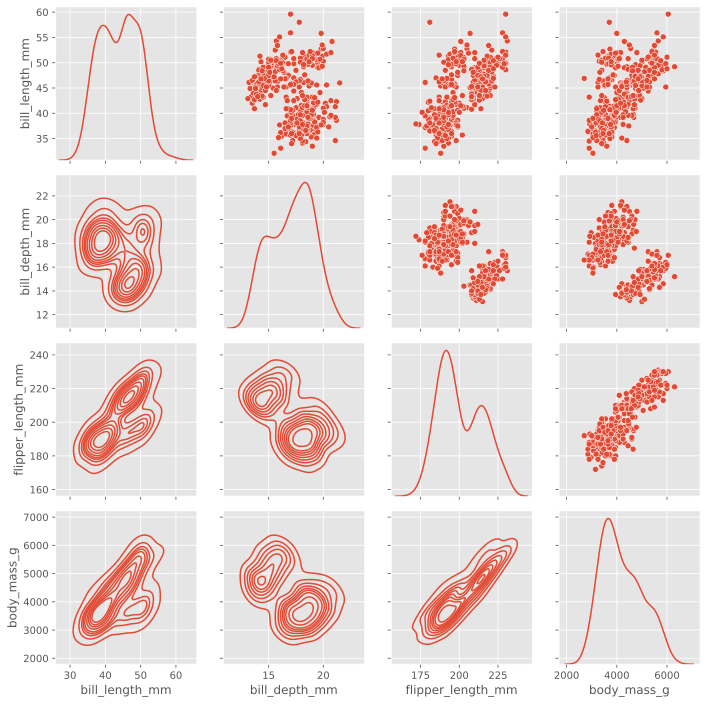

In [13]:
#플롯의 위쪽 및 아래쪽 삼각형에 다른 기능을 사용할 수도 있음

g = sns.PairGrid(data=penguins, diag_sharey=False)
g.map_upper(sns.scatterplot) #대각선 기준 상단
g.map_lower(sns.kdeplot)     #대각선 기준 하단
g.map_diag(sns.kdeplot)      #대각선

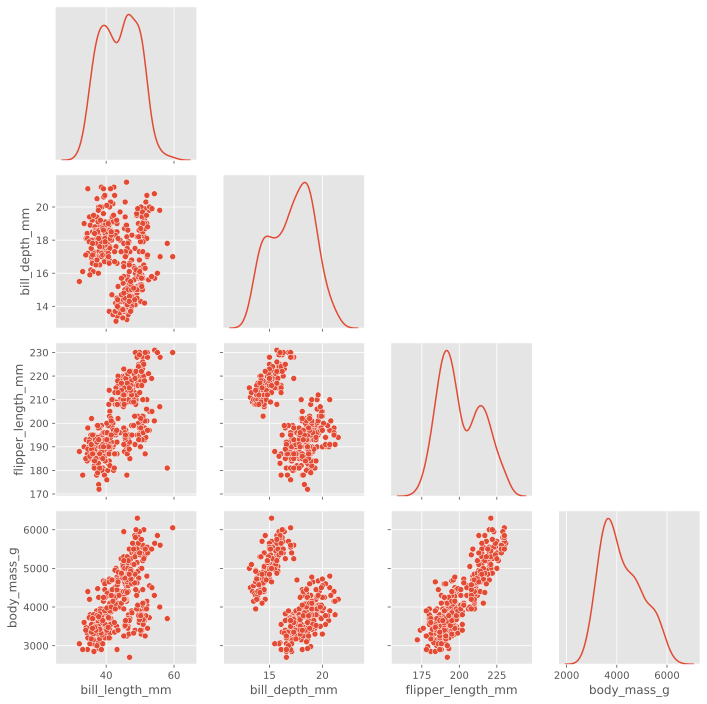

In [14]:
#아래 한쪽만 보여주기
g = sns.PairGrid(data=penguins, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

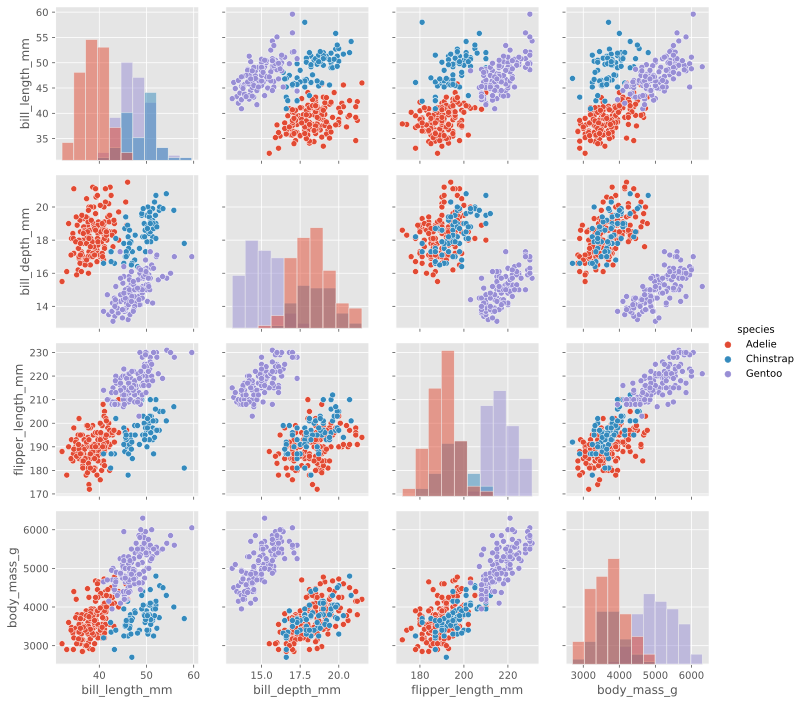

In [15]:
#hue 옵션 사용
g = sns.PairGrid(data=penguins, hue='species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [16]:
g = sns.PairGrid(data=penguins, hue='species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, size=penguins['sex'])
g.add_legend(title="", adjust_subtitles=True)

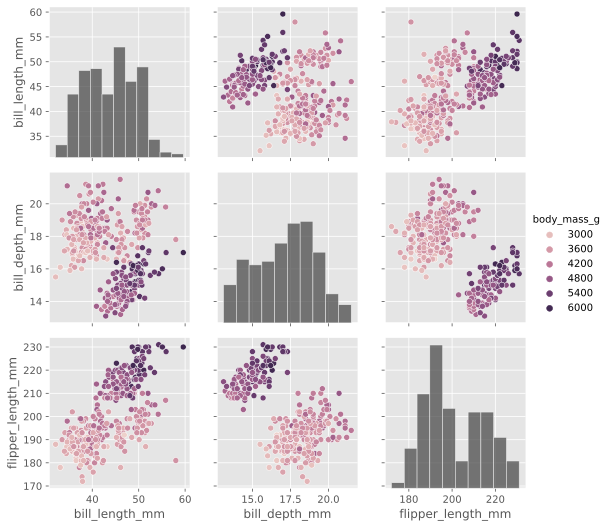

In [17]:
g = sns.PairGrid(data=penguins, hue='body_mass_g')
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

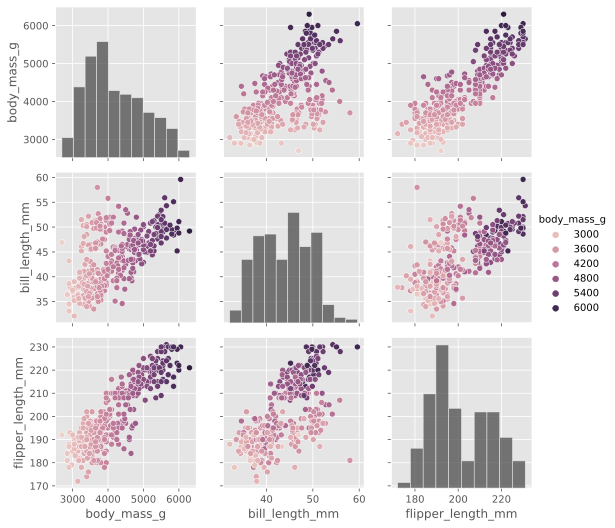

In [18]:
#vars 옵션에 직접할당
variables = ["body_mass_g", "bill_length_mm","flipper_length_mm"]
g = sns.PairGrid(data=penguins, hue='body_mass_g',vars=variables)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

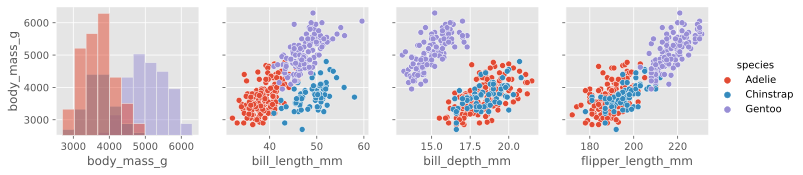

In [20]:
#x_vars ,y_vars 매개변수에 직접할당

x_vars = ["body_mass_g","bill_length_mm","bill_depth_mm","flipper_length_mm"]
y_vars = ["body_mass_g"]
g = sns.PairGrid(data=penguins, hue='species', x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

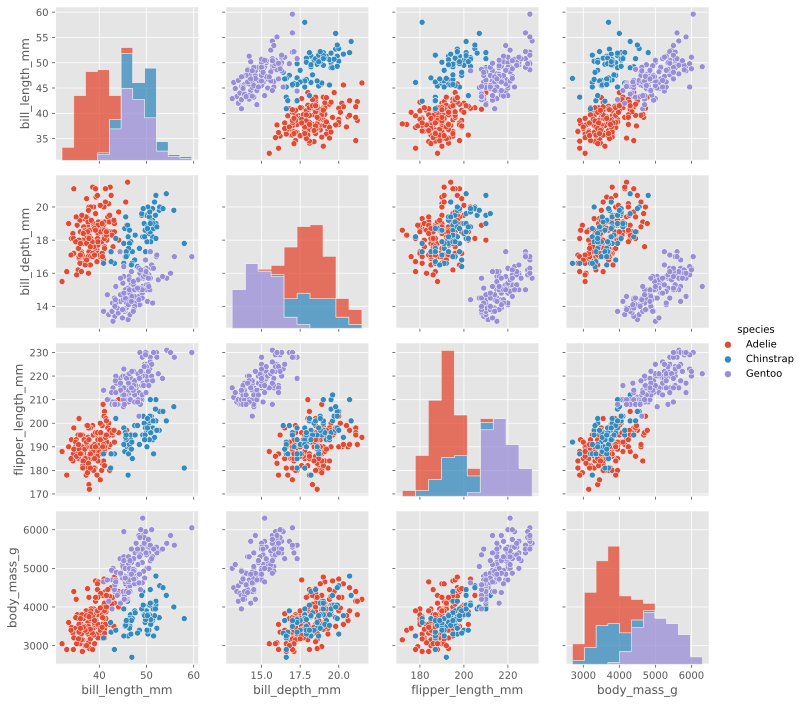

In [21]:
g = sns.PairGrid(data=penguins, hue='species')
g.map_diag(sns.histplot, multiple='stack', element="step")
g.map_offdiag(sns.scatterplot)
g.add_legend()